#### Use iris flower dataset to create classification model. Your task is to predict the class to which these plants belong. There are three classes in the dataset: Iris-setosa, Iris-versicolor and Iris-virginica. Create the classification model using k-nn classifier and evaluate the performance of your classifier. Find the best value of ‘k’ for iris dataset.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
from sklearn.metrics import f1_score

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/rahul96rajan/sample_datasets/master/iris.csv')
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
X = data.drop('species', axis=1)
y = data['species']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [6]:
knn = KNeighborsClassifier()
skf = StratifiedKFold(n_splits=4, shuffle=False)
params = {'n_neighbors':np.arange(3,21,2)}

gs = GridSearchCV(estimator=knn, param_grid=params, scoring='f1_micro', cv=skf)

In [7]:
gs.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=None, shuffle=False),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 3,  5,  7,  9, 11, 13, 15, 17, 19])},
             scoring='f1_micro')

In [8]:
print(gs.best_estimator_)
print(gs.best_score_)

KNeighborsClassifier(n_neighbors=7)
0.9618945868945868


In [9]:
k = list(range(3,21,2))
scores_train = []
scores_cv = []

for i in k:
    _knn = KNeighborsClassifier(n_neighbors=i)
    _knn.fit(X_train, y_train)
    _y_pred_train = _knn.predict(X_train)
    train_accuracy = accuracy_score(y_train, _y_pred_train)
    _score_cv = cross_val_score(_knn, X_train, y_train, scoring='accuracy', cv=4).mean()
    
    scores_train.append(train_accuracy)
    scores_cv.append(_score_cv)

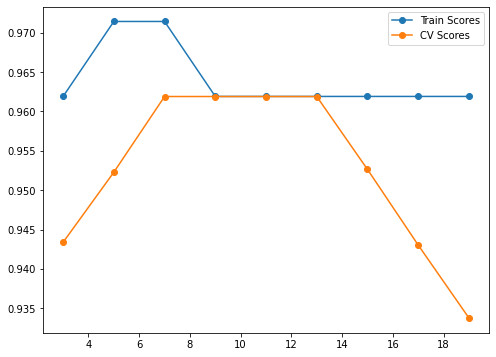

In [10]:
plt.figure(figsize=(8,6))
plt.plot(k, scores_train, marker='o',label='Train Scores')
plt.plot(k, scores_cv, marker='o', label='CV Scores')
plt.legend()
plt.show()

### Both GridSearchCV and graph plot suggest '*n_neighbors=7*'

In [11]:
y_pred_test = gs.predict(X_test)
y_pred_train = gs.predict(X_train)

In [12]:
print('F1 Score(Train): ', f1_score(y_train, y_pred_train, average='micro'))
print('F1 Score(Test): ', f1_score(y_test, y_pred_test, average='micro'))

F1 Score(Train):  0.9714285714285714
F1 Score(Test):  0.9777777777777777
